
# Inferential Statistics
# Case Study

Business Context

A leading pharmaceutical company has tested five batches of a vaccine. With 300,000 doses already administered, the sixth batch of 60,000 doses needs quality assurance testing for effectiveness and curing time.

• Previous data shows each dose is twice as likely to be satisfactory as unsatisfactory. This test is to ensure the sixth batch's quality, not a clinical trial.

## Objective

Analyze random samples from the sixth batch to infer its quality and curing time. Your tasks include:
### Task 1: Analyze 10 randomly selected doses to determine:

• Probability distribution of unsatisfactory doses

• Probability that exactly 3 out of 10 doses are unsatisfactory

• Probability that at most 3 out of 10 doses are unsatisfactory

• Probability that more than 8 out of 10 doses are satisfactory

### Task 2: For 20 doses requested by the New York City administration:
• Probability that at least 11 out of 20 doses are unsatisfactory

• Probability that at most 5 out of 20 doses are unsatisfactory

• Probability that at least 13 out of 20 doses are satisfactory

### Task 3: Analyze the time of effect for 50 doses given to volunteers.

• Probability that the time of effect is less than 11.5 hours

• Probability that the time of effect is more than 10 hours

• Calculate the 90th percentile of the time of effect

• Use dataset doses.csv. The features in the dataset are:


*   drug_serial_number: Unique serial number of a dose
*   time_of_effect: Time taken for the dose to completely cure COVID (in hours):




## Binomial

### Solution Approach
Let p be the probability that a dose is unsatisfactory. Since a dose is twice as likely to be satisfactory, the probability of a satisfactory dose is 2p.

* According to probability rules:
  *   p+2p=1
  *   3p=1
  *   p=0.33
* Thus, the probability of a dose being unsatisfactory (success in this context) is 0.33.

# Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
import scipy.stats as stats

# Task 1
• The quality assurance team randomly selected 10 volunteers for a trial, giving each one dose.

• In this setup:
  *   Each trial (dose) has two outcomes: satisfactory or unsatisfactory.
  *   There are IO trials, each dose representing one trial.
  *   Trials are independent; each dose is given separately.
  *   The probability of an unsatisfactory dose is p=O.33.
  *   Thus, the number of unsatisfactory doses follows a Binomial distribution with n=IO and p=O.33.



In [3]:
n = 10
p = 0.33
k = np.arange(0,11)
binomial_prob = binom.pmf(k = k,n=n, p=p)
binomial_prob

array([1.82283780e-02, 8.97815635e-02, 1.98993465e-01, 2.61364552e-01,
       2.25280640e-01, 1.33150945e-01, 5.46515074e-02, 1.53816609e-02,
       2.84101573e-03, 3.10956945e-04, 1.53157899e-05])

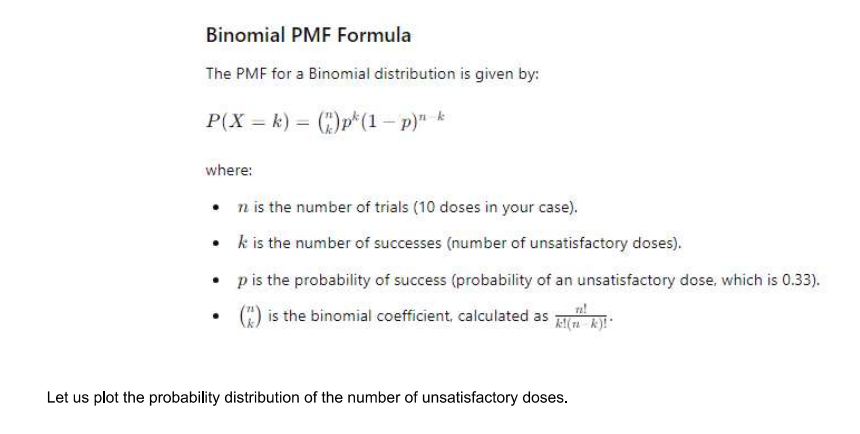

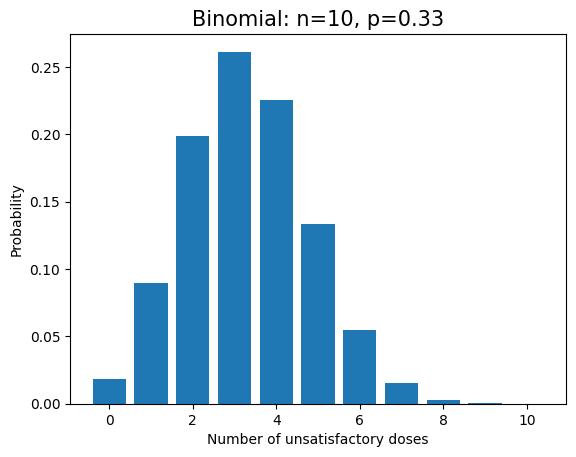

In [4]:
#plot the probability distribution plt.figure(figsize=(10,4))
plt.bar(k, binomial_prob)
plt.title('Binomial: n=%i, p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
plt.show()

The above plot visualizes the mass probabilities for the different number of unsatisfactory doses. We can observe that:
* The mass probability that exactly 3 doses will not do a satisfactory job is comparatively higher than all the other mass probabilities.
* The chances are very Iow that 9 or 10 doses are unsatisfactory.

## A) Let us find the probability that exactly 3 doses out of 10 will not do a satisfactory job.

Suppose X is the random variable that denotes the number of unsuccessful doses. We are to calculate the probability P(X = 3).

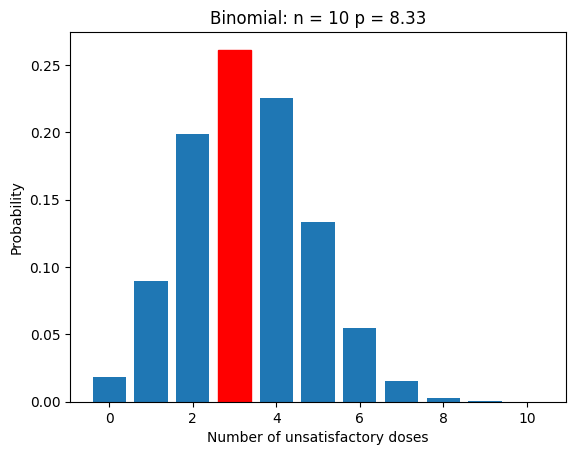

In [5]:
barl=plt.bar(k, binomial_prob)
plt.title('Binomial: n = 10 p = 8.33' )
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
barl[3].set_color('r')

* In the above graph, the red bar represents P(X = 3)
* Let's calculate the probability that out of 10 randomly selected doses, exactly 3 will not do a satisfactory job.
* We will use binom.pmf() for this.
* The function binom.pmf(k,n,p) calculates the probability P(X = k)

In [6]:
# calculate P(X = 3) using the pmf function
binom.pmf( k = 3 , n=n, p=p)

0.2613645515525908

The same result can be obtained by selecting the value at index 3 in the binomial probabilities array

In [7]:
binomial_prob [3]

0.2613645515525908

The probability that exactly 3 doses out of 10 will not do a satisfactory job is 26.14%.

## B) Let us find the probability that at most 3 doses out of 10 will not do a satisfactory job.
* We have to calculate the probability P(X <= 3).

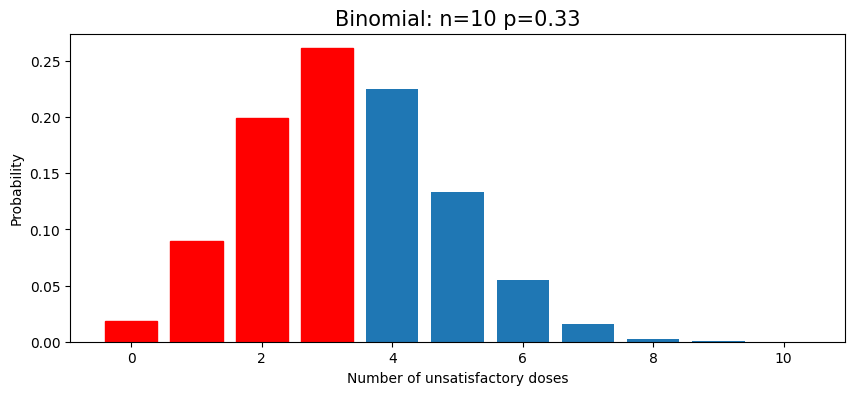

In [9]:
plt.figure(figsize=(10,4))
barl=plt.bar(k, binomial_prob)
plt.title('Binomial: n=%i p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
for i in range(0,4): barl[i].set_color('r')
plt.show()

* In the above graph, the red region represents P(X <= 3).
* Let's calculate the probability that out of 10 randomly selected doses, at most 3 will not do a satisfactory job.
* We will use binom.cdf() for this.
* The function binom.cdf(k,n,p) calculates the probability P(X <= k)

In [10]:
sum(binomial_prob[:4])

0.5683679584925132

In [11]:
#calculate P(x<=3) using the cdf function
prob_atmost3 =binom.cdf(k = 3,n=n, p = p)
print(prob_atmost3)

0.5683679584925142


56.84% is the probability that at most 3 doses out of 10 will not do a satisfactory job.

## C) Let us find the probability that more than 8 doses out of 10 will do a satisfactory job.
* If the number of doses that do a satisfactory job is more than 8, then the number of doses that do an unsatisfactory job are less than 2, i.e., the number of doses that do an unsatisfactory job are at most 1.
* So, we need to compute the probability that at most 1 dose does an unsatisfactory job, i.e., P(X <= 1)

In [12]:
n = 10
k=np.arange(0,11)
p_satisfactory=1-.33
binomial_prob_satisfactory = binom.pmf(k=k,n=n, p=p_satisfactory)
binomial_prob_satisfactory

array([1.53157899e-05, 3.10956945e-04, 2.84101573e-03, 1.53816609e-02,
       5.46515074e-02, 1.33150945e-01, 2.25280640e-01, 2.61364552e-01,
       1.98993465e-01, 8.97815635e-02, 1.82283780e-02])

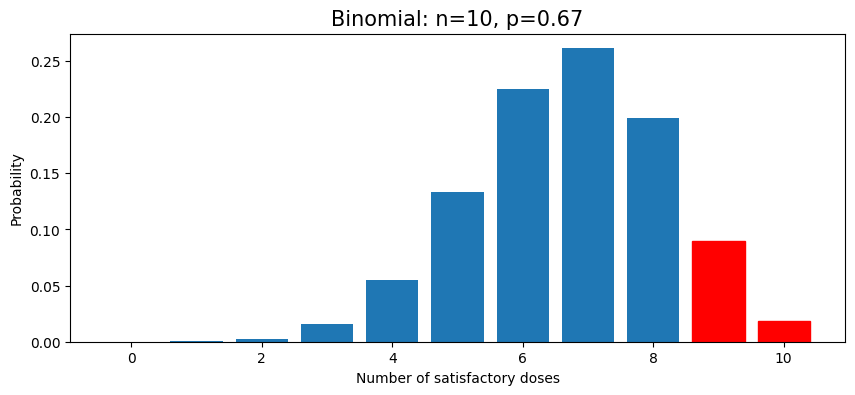

In [14]:
plt.figure(figsize=(10,4))
barl=plt.bar(k, binomial_prob_satisfactory)
plt.title('Binomial: n=%i, p=%.2f' % (n,p_satisfactory), fontsize=15)
plt.xlabel('Number of satisfactory doses')
plt.ylabel('Probability')
barl[9].set_color('r')
barl[10].set_color('r')

* In the above graph, the red region represents P(X >= 8).
* Let's calculate the probability that out of 10 randomly selected doses, more than 8 will do a satisfactory job.
* We will use binom.cdf() for this.
* The function binom.cdf(k,n,p) calculates the probability P(X <= k)

In [16]:
prob_atmost1= binom.cdf(k=8, n=n, p=1-p)
print(1-prob_atmost1)

0.10800994155329091


10.80% is the probability that more than 8 doses out of 10 will do a satisfactory job.

## Task 2
* The New York City administration has requested 20 doses for healthcare workers. The Quality Assurance team needs to find the probability of unsatisfactory doses.
* Here, the number of unsatisfactory doses follows a Binomial distribution with parameters n=20 and p=0.33

In [17]:
n = 20
p = 0.33
k=np.arange(0,21)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [18]:
from scipy.stats import binom
binomial_prob = binom.pmf(k = k,n=n, p = p)
binomial_prob

array([3.32273766e-04, 3.27314456e-03, 1.53153854e-02, 4.52603926e-02,
       9.47428368e-02, 1.49326023e-01, 1.83871596e-01, 1.81127244e-01,
       1.44969380e-01, 9.52037718e-02, 5.15805510e-02, 2.30957691e-02,
       8.53164605e-03, 2.58594094e-03, 6.36836201e-04, 1.25466237e-04,
       1.93115010e-05, 2.23803172e-06, 1.83719022e-07, 9.52510246e-09,
       2.34573419e-10])

## A) Find the probability that at least 11 doses will not do a satisfactory job out of the 20 doses.
We are to calculate the probability P(X >= 11). It can be obtained using the cdf function

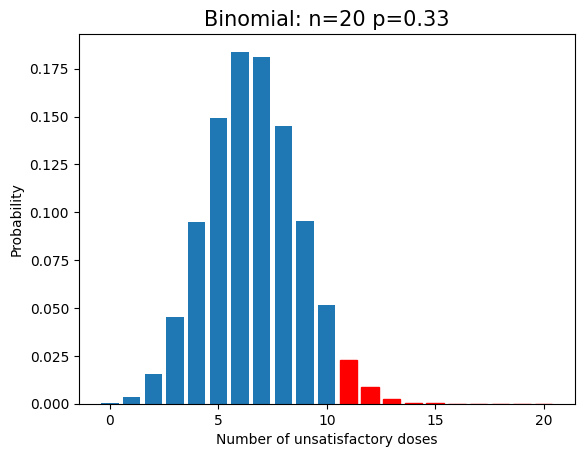

In [20]:
# plot the probability distribution to better visualize the calculations. #cdf function can be directly used to calculate the probability
barl=plt.bar(k, binomial_prob)
plt.title('Binomial: n=%i p=%.2f' % (n,p), fontsize  = 15 )
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
for i in range(11,21):
  barl[i].set_color('r')
plt.show()

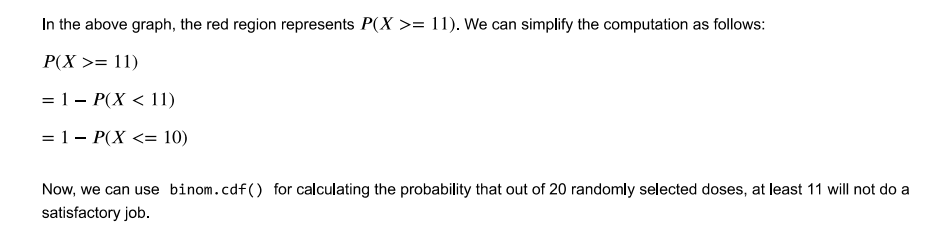

In [21]:
sum(binomial_prob[11:])

0.034997401526483854

In [23]:
# calculate P(x >= 11) using cdf function
prob_atleast11 = 1- binom.cdf ( k = 10 , n = n, p = p)
print(prob_atleast11)

0.03499740152648401


There is 3.5% chance that at least 11 out of 20 doses will not do a satisfactory job

## B) Find the probability that at most 5 doses out of the 20 will not do a satisfactory job.
We have to calculate the probability P(X <= 5) .

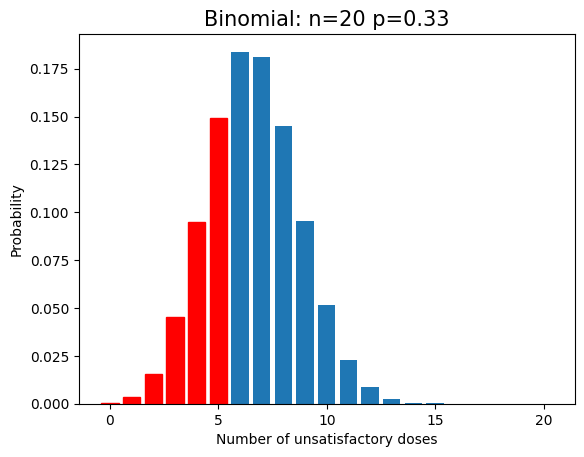

In [24]:
# plot the probability distribution to better visualize the calculations. # cdf function can be directly used to calculate the probability
barl=plt.bar(k, binomial_prob)
plt.title('Binomial: n=%i p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
for i in range(0,6):
  barl[i].set_color('r')
plt.show()

* In the above graph, the red region represents P(X <= 5).
* Let's calculate the probability that out of 20 randomly selected doses, at most 5 will not do a satisfactory job.
* We will use binom.cdf() for this.
* The function binom.cdf(k,n,p) calculates the probability P(X <= k)

In [25]:
# calculate the probability P(X<=5) using the pmf function
prob_atmost5= binom.cdf(k=5, n=n, p=p)
print(prob_atmost5)

0.30825005639386527


30.82% is the probability that at most 5 doses out of 20 will not do a satisfactory job.

## C) Calculate the probability that at least 13 doses out of the 20 will do a satisfactory job
* If the number of doses that do a satisfactory job at least 13, then the number of doses that do an unsatisfactory job are at most 7, i.e., the number of doses that do an unsatisfactory job are less than or equal to 7.
* So, we need to compute the probability P(X <= 7)

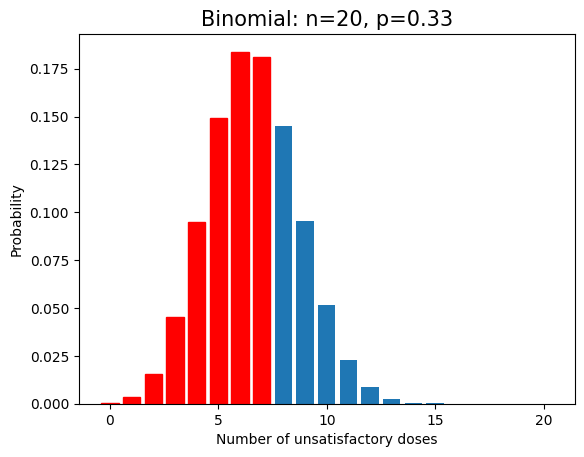

In [26]:
# plot the probability distribution to better visualize the calculations. #cdf function can be directly used to calculate the probability
barl=plt.bar(k, binomial_prob)
plt.title('Binomial: n=%i, p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
for i in range(0,8):
  barl[i].set_color('r')
plt.show()

* In the above graph, the red region represents P(X <= 7).
* Let's calculate the probability that out of 20 randomly selected doses, more than 13 will do a satisfactory job. We will use binom.cdf() for this.
* The function binom.cdf(k,n,p) calculates the probability P(X <= k)

In [27]:
# calculate the probability P(X<=7) using the caf function
prob_atmost6=binom.cdf(k=7, n=n, p=p)
print(prob_atmost6)

0.6732488959678964


calculate the probability P(X<=7) using the caf function prob_atmost6 binom.cdf(k=7, n=n, p=p) print(prob_atmost6)